<a href="https://colab.research.google.com/github/Daniedmath1405/Estad-stica-I-UIS/blob/main/Daniel_Naranjo_Isaac_V%C3%A1squez_Parte_pr%C3%A1ctica_tercer_parcial_Estad%C3%ADstica_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte práctica tercer parcial estadística I
## Integrantes
* Brayan Isaac Vásquez Portocarrero
* Daniel Eduardo Naranjo Garzón

In [2]:
#Importación de paquetes usados
import pandas as pd
import io
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from google.colab import *
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


## Estadística descriptiva para variables cualitativas
*   Gráficos para datos de una variable cualitativa
*   Proporciones asociadas a los valores de una variable cualitativa

In [3]:
ruta_archivo = '/content/drive/MyDrive/Universidad/Cuarto semestre/Estadística/Parcial 3/nac2020.csv'
tabla = pd.read_csv(ruta_archivo, sep=',', index_col=0, encoding='latin-1')
print(tabla.head(3))

          COD_MUNIC  AREANAC  SIT_PARTO OTRO_SIT  SEXO  PESO_NAC  TALLA_NAC  \
COD_DPTO                                                                      
44              560        3          2      NaN     2         9          9   
44              560        3          2      NaN     1         9          9   
44              560        3          2      NaN     1         9          9   

           ANO  MES  ATEN_PAR  ...  AREA_RES  N_HIJOSV  FECHA_NACM  N_EMB  \
COD_DPTO                       ...                                          
44        2020   11         5  ...       3.0         1         NaN      1   
44        2020   10         5  ...       3.0         1         NaN      1   
44        2020   10         5  ...       3.0         1         NaN      1   

          SEG_SOCIAL  IDCLASADMI  EDAD_PADRE  NIV_EDUP  ULTCURPAD  PROFESION  
COD_DPTO                                                                      
44                 2         2.0          20        99      

In [4]:
tges= f'Tiempo de gestación de un recién nacido vivo en Colombia'
tnac= f'Talla de nacimiento de un recién nacido vivo en Colombia'

tabla1 = tabla[["T_GES", "TALLA_NAC"]] #, "IDFACTORRH"
tabla1.head(4)
df2 = tabla1[(tabla1.T_GES != 9) & (tabla1.TALLA_NAC != 9)] # & (tabla1.IDFACTORRH != 9)
df2.head(4)

,T_GES,TALLA_NAC
COD_DPTO,,
52,4,4
20,4,5
27,4,5
27,4,4


In [5]:
df2.T_GES.head(2)
df2.loc[:, 'T_GES'] = df2['T_GES'].astype(str)
df2.loc[:, 'TALLA_NAC'] = df2['TALLA_NAC'].astype(str)
df2.head(6)


,T_GES,TALLA_NAC
COD_DPTO,,
52,4,4
20,4,5
27,4,5
27,4,4
27,4,5
20,4,4


In [6]:
df2.loc[(df2.T_GES == "1"), "T_GES"], df2.loc[(df2.T_GES == "2"), "T_GES"], df2.loc[(df2.T_GES == "3"), "T_GES"], df2.loc[(df2.T_GES == "4"), 'T_GES'], df2.loc[(df2.T_GES == "5"), 'T_GES'], df2.loc[(df2.T_GES == "6"), 'T_GES'] = '-21', '22-27', '28-37', '38-42', '42+', 'Ignorado'
df2.loc[(df2.TALLA_NAC == "1"), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == "2"), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == "3"), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == "4"), 'TALLA_NAC'], df2.loc[(df2.TALLA_NAC == "5"), 'TALLA_NAC'], df2.loc[(df2.TALLA_NAC == "6"), 'TALLA_NAC'] = "-20", '20-29', '30-39', '40-49', '50-59', '60+'
df2.head(12)

,T_GES,TALLA_NAC
COD_DPTO,,
52,38-42,40-49
20,38-42,50-59
27,38-42,50-59
27,38-42,40-49
27,38-42,50-59
20,38-42,40-49
27,38-42,40-49
27,38-42,50-59
27,38-42,40-49


### Gráficos para datos de una variable cualitativa

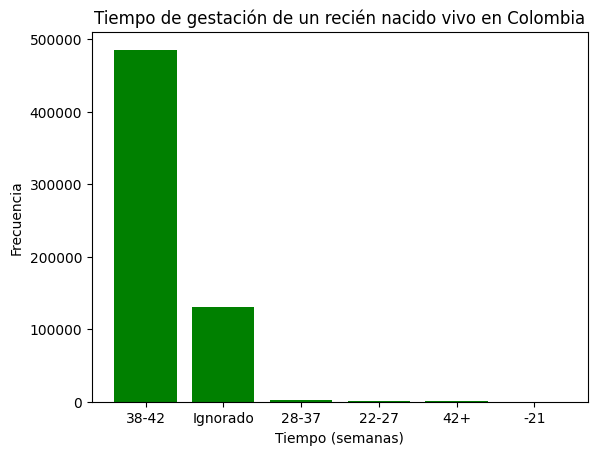

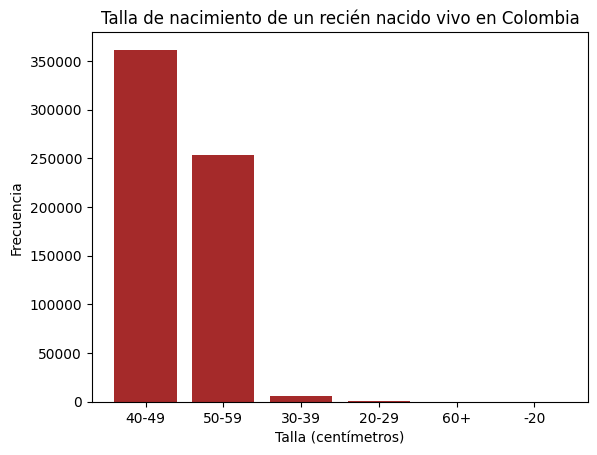

In [7]:
x_values = df2.T_GES.unique()
y_values = df2.T_GES.value_counts().tolist()
plt.bar(x_values, y_values, color = "green")
plt.title(tges)
ax = plt.subplot()  # Axis
ax.set_xlabel('Tiempo (semanas)')
ax.set_ylabel('Frecuencia')
plt.show()

x_values1 = df2.TALLA_NAC.unique()
y_values1 = df2.TALLA_NAC.value_counts().tolist()
plt.bar(x_values1, y_values1, color = "brown")
plt.title(tnac)
ax = plt.subplot()  # Axis
ax.set_xlabel('Talla (centímetros)')
ax.set_ylabel('Frecuencia')
plt.show()

In [8]:
sizes = np.array(y_values)
sizes1 = np.array(y_values1)
cant= len(df2.T_GES)
sizes, sizes1, cant

(array([485433, 130485,   2236,   1482,   1163,     28]),
 array([361444, 253072,   5716,    478,    115,      2]),
 620827)

Respecto a la variable "Tiempo de gestación de un recién nacido vivo en Colombia", nótese que el rango correspondiente al tiempo comprendido a entre 38- 42 semanas se tienen 485433 recién nacidos en Colombia, y es el rango de mayor frecuencia. Es necesario ver que a una cantidad significativa de 130485 recien nacidos no les sea reconocido el tiempo de gestación debido para su nacimiento [^1] . Por otra parte, los rangos de edad -21, 22-27, 28-37 y +42 tienen una frecuencia de 4909 recién nacidos en Colombia.

Ahora, respecto a la variable "Talla de nacimiento de un recién nacido en Colombia", nótese que una cantidad de 361444 recien nacidos vivos nacieron con talla entre 40 y 49 cm, y es el rango de mayor frecuencia. El rango de talla de 50-59 cm cuenta con 253072 recién nacidos y los rangos -20, 20-29, 30-39 y 60+ tienen 6311 recién nacidos vivos en Colombia.

> [^1]: Consideramos dejar los datos con valor `Ignorado`, pues al ejecutar el código `df2.head(12)`, el eliminar el valor Ignorado afecta el análisis para la variable `TALLA_NAC`

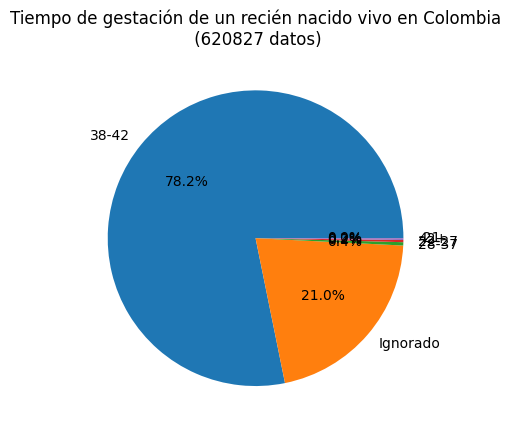

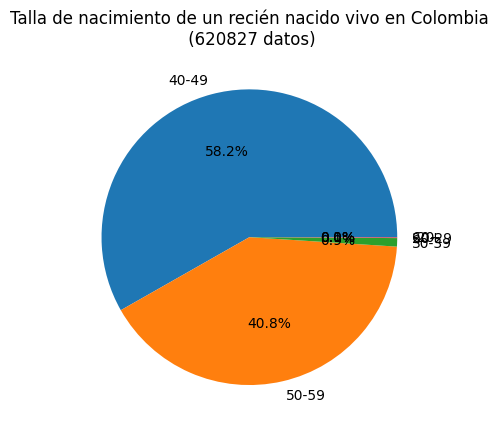

In [9]:
plt.pie(y_values, labels = x_values, autopct='%1.1f%%')
plt.title(f'{tges}\n ({len(df2.T_GES)} datos)')
plt.show()

plt.pie(y_values1, labels = x_values1, autopct='%1.1f%%')
plt.title(f'{tnac}\n ({len(df2.TALLA_NAC)} datos)')
plt.show()

In [10]:
porcentaje = [(x/len(df2.T_GES)*100) for x in y_values]
print(f'{x_values}\n{porcentaje}\n')

porcentaje1 = [(x/len(df2.TALLA_NAC)*100) for x in y_values1]
print(f'{x_values1}\n{porcentaje1}\n')

['38-42' 'Ignorado' '28-37' '22-27' '42+' '-21']
[78.19134799227481, 21.017932531929183, 0.3601647479893754, 0.23871384459760933, 0.18733077008570825, 0.004510113123301661]

['40-49' '50-59' '30-39' '20-29' '60+' '-20']
[58.21976170495162, 40.76369101214992, 0.9207073790282962, 0.07699407403350692, 0.018523678899274677, 0.00032215093737869]



### Proporciones asociadas a los valores de una variable cualitativa

Respecto a la variable "Tiempo de gestación de un recién nacido vivo en Colombia", aproximadamente el 78.19% de los recién nacidos vivos en Colombia nacen entre las 38 y 42 semanas de gestación, el 21.01% nace a un tiempo ignorado, el 0.36% nace entre las 28 y 37 semanas, el 0.24% entre las 22 y 27 semanas, el 0.19% a más de las 42 semanas y el 0.01% a menos de las 20 semanas.

Ahora, respecto a la variable "Talla de nacimiento de un recién nacido en Colombia", cerca del 58.22% de los recien nacidos vivos en Colombia tienen una talla entre 40 y 49 cm, el 40.76% entre 50 y 59 cm, el 0.92% entre 30 y 39 cm, el 0.08% entre 20 y 29 cm, el 0.02% a más de los 60 cm y el 0.0003% a menos de los 20 cm.



## Tablas de contingencia


*   Representación gráfica de una tabla de contingencia
*   Proporciones asociadas a una tabla de contingencia



### Representación gráfica de una tabla de contingencia

In [17]:
tabla_cont = pd.crosstab(df2.TALLA_NAC, df2.T_GES)
tabla_cont

T_GES,-21,22-27,28-37,38-42,42+,Ignorado
TALLA_NAC,,,,,,
-20,0,2,0,0,0,0
20-29,22,260,53,76,0,67
30-39,6,1872,3619,198,0,21
40-49,0,102,89212,162543,256,959
50-59,0,0,37593,322515,902,434
60+,0,0,8,101,5,1


#### Una tabla adicional: Tabla de probabilidades de `tabla_cont`

In [12]:
tabla_prob = tabla_cont.apply(lambda x: x/cant, axis=1)
tabla_prob

TALLA_NAC,-20,20-29,30-39,40-49,50-59,60+
T_GES,,,,,,
-21,0.000000,0.000035,0.000010,0.000000,0.000000,0.000000
22-27,0.000003,0.000419,0.003015,0.000164,0.000000,0.000000
28-37,0.000000,0.000085,0.005829,0.143699,0.060553,0.000013
38-42,0.000000,0.000122,0.000319,0.261817,0.519493,0.000163
42+,0.000000,0.000000,0.000000,0.000412,0.001453,0.000008
Ignorado,0.000000,0.000108,0.000034,0.001545,0.000699,0.000002


Podemos visualizar en la `tabla_prob` algunas probabilidades curiosas, por ejemplo, el 26.18% de los recién nacidos vivos en Colombia nace con talla entre 40 y 49 cm y entre 38 y 42 semanas de gestación.

Además, podemos hallar algunas probabilidades condicionales, por ejemplo, la probabilidad de escoger un recién nacido en Colombia de talla entre 50 y 59 cm dado que nació entre las 28 y 37 semanas. Esto corresponde a $$ P([50-59]\,cm \,|\, [28-37]\,sem)= \frac{P([50-59]\,cm\cap [28-37]\,sem)}{P([28-37]\,sem)} = \frac{37593}{130485}\approx 0.288 $$

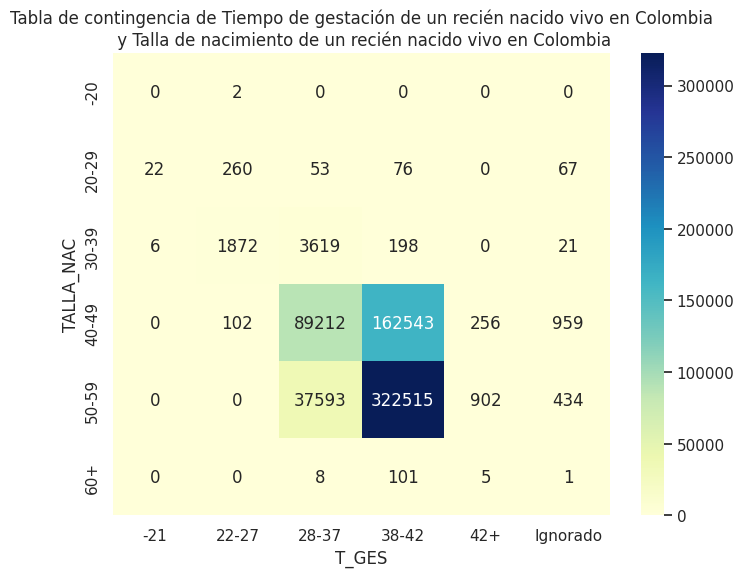

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(tabla_cont,  annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title(f'Tabla de contingencia de {tges}\n y {tnac}')
plt.show()

In [14]:
res = stats.chi2_contingency(tabla_cont)
chi, valor_p, _, _ = res
print(f"El valor de la estadística Chi cuadrado es {chi} y el valor p es d {valor_p}")

El valor de la estadística Chi cuadrado es 299847.0666226869 y el valor p es d 0.0


*   Si valor p < 0.05 se rechaza la hipótesis nula
*   Si valor p > 0.05 no se rechaza la hipótesis nula

Como el valor $p=0< 0.05$ se rechaza la hipótesis nula, es decir, no se rechaza con una confianza del 95% que el tiempo de gestación y la talla de nacimiento  estén asociadas para los individuos recién nacidos en Colombia.


In [15]:
coeficiente_contingencia = math.sqrt(chi/(chi + len(df2.T_GES)))
coeficiente_phi = math.sqrt(chi/len(df2.T_GES))
coeficiente_v_cramer = math.sqrt(chi/(len(df2.T_GES)*min(4-1, 2-1)))
print(f"Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por {coeficiente_contingencia}, {coeficiente_phi} y {coeficiente_v_cramer}")

Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por 0.5706856432960946, 0.6949676740063134 y 0.6949676740063134


De acuerdo con el artículo Landis, J. R., & Koch, G. G. (1977). The measurement of observer agreement for categorical data. biometrics, 159-174, el cual se puede consultar en el siguiente [link](https://www.jstor.org/stable/2529310), se tiene que el tiempo de gestación de un recién nacido vivo en Colombia y la talla de nacimiento de un recién nacido vivo en Colombia están fuertemente asociados.


## Conclusiones

Luego del análisis de los datos presentes, se pueden concluir tantas cosas como:
* Se resalta el alto porcentaje de talla de nacimiento de un recién nacido vivo en Colombia entre los 40 y 49 cm, correspondiente al 58.22%.
* Hay una correlación significativa entre las variables tratadas. Note que está presente una correlación directa de 'a más tiempo de gestación, mayor peso', pero en los intervalos extremos es presente una menor frecuencia debido a que son datos atípicos.
* Es preocupante que no se les tenga en cuenta el tiempo de gestación a bastantes recien nacidos en el país, esto es importante pues de esto se evalúa como llevar una madre una vida post-parto correctamente y como vivir el bebé sus primeras semanas de la manera más amena posible.
